In [1]:
import warnings
warnings.filterwarnings("ignore") 

import numpy as np
import pandas as pd

import nltk    #Natural language processing tool-kit
nltk.download('stopwords')
  
from nltk.corpus import stopwords                   #Stopwords corpus

from keras.datasets import imdb
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer, TfidfTransformer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/souhailakirar/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
Using TensorFlow backend.


## Import des données

In [14]:
# filename = "./sentiment_labelled_sentences/"

df = pd.read_csv('imdb_labelled.txt', sep="\t")
df.columns = ["sentence", "label"]

print("shape", df.shape)

shape (747, 2)


In [3]:
df.head()

,sentence,label
0,Not sure who was more lost - the flat characte...,0
1,Attempting artiness with black & white and cle...,0
2,Very little music or anything to speak of.,0
3,The best scene in the movie was when Gerardo i...,1
4,"The rest of the movie lacks art, charm, meanin...",0


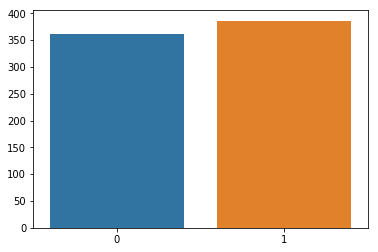

In [4]:
sns.barplot(np.unique(df['label']),df.groupby('label').count().values[:,0])

## Bag of words 

### Sur un sous-jeu de données

In [15]:
X_sub = df['sentence'][0:10]

On crée un dictionnaire, puis on compte le nombre d'apparition des mots du dictionnaire dans chaque texte (critique)

In [6]:
count_vect = CountVectorizer()
X_sub_counts = count_vect.fit_transform(X_sub)
dictionary_sub   = count_vect.get_feature_names()
print(dictionary_sub)

['about', 'acting', 'adorable', 'almost', 'and', 'angles', 'anything', 'art', 'artiness', 'as', 'attempting', 'audience', 'baby', 'became', 'because', 'best', 'bit', 'black', 'buffet', 'camera', 'casting', 'characters', 'charm', 'clever', 'disappointed', 'effort', 'emptiness', 'empty', 'even', 'existent', 'find', 'flat', 'for', 'gerardo', 'good', 'guess', 'half', 'head', 'his', 'hours', 'if', 'in', 'is', 'it', 'jimmy', 'keeps', 'kids', 'lacks', 'lines', 'little', 'lost', 'loved', 'meaning', 'messages', 'more', 'movie', 'music', 'nearly', 'non', 'not', 'of', 'or', 'out', 'owls', 'plot', 'poor', 'predictable', 'rest', 'ridiculous', 'running', 'saw', 'scene', 'science', 'song', 'speak', 'sure', 'teacher', 'that', 'the', 'those', 'thought', 'through', 'to', 'today', 'trying', 'two', 'very', 'walked', 'was', 'wasted', 'were', 'when', 'white', 'who', 'whom', 'with', 'works']


In [7]:
print(count_vect.vocabulary_.get(u'who'))

93


In [8]:
print(X_sub_counts.shape) 
print(X_sub_counts[0])
print(type(X_sub_counts))

(10, 97)
  (0, 62)	1
  (0, 87)	1
  (0, 94)	1
  (0, 60)	1
  (0, 36)	1
  (0, 57)	1
  (0, 11)	1
  (0, 61)	1
  (0, 21)	1
  (0, 31)	1
  (0, 78)	2
  (0, 50)	1
  (0, 54)	1
  (0, 88)	1
  (0, 93)	1
  (0, 75)	1
  (0, 59)	1
<class 'scipy.sparse.csr.csr_matrix'>


In [9]:
print(X_sub_counts.toarray()[0,:])

[0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 1 0 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 2 0 0 0 0 0 0 0 0 1 1 0 0 0 0 1 1 0 0]


In [10]:
word_counts = pd.DataFrame(X_sub_counts.toarray(),columns = dictionary_sub)
word_total_counts = pd.DataFrame()
word_total_counts['count'] = word_counts.sum(axis=0)
word_total_counts['word'] = dictionary_sub

In [11]:
word_total_counts_sorted_top  = word_total_counts.sort_values(by="count",ascending = False).iloc[0:20]

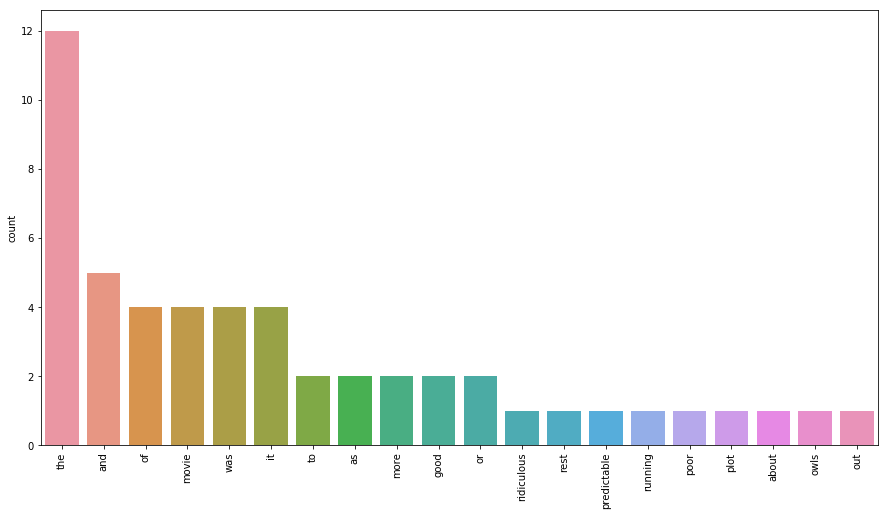

In [12]:
plt.figure(figsize=(15,8))
sns.barplot(x = word_total_counts_sorted_top.index,y=word_total_counts_sorted_top['count'])
plt.xticks(rotation=90,fontsize=10)
plt.show()

On définit une fonction qui prend en encapsule ce qui précède

In [10]:
def most_frequent_words(count_vect,data):    
    data_counts = count_vect.fit_transform(data)
    dictionary   = count_vect.get_feature_names()
    print("Taille du dictionnaire : ",len(dictionary))
    word_counts = pd.DataFrame(data_counts.toarray(),columns = dictionary)
    word_total_counts = pd.DataFrame()
    word_total_counts['count'] = word_counts.sum(axis=0)
    word_total_counts['word'] = dictionary
    word_total_counts_sorted_top  = word_total_counts.sort_values(by="count",ascending = False).iloc[0:20]
    plt.figure(figsize=(15,8))
    sns.barplot(x = word_total_counts_sorted_top.index,y=word_total_counts_sorted_top['count'])
    plt.xticks(rotation=90,fontsize=10)
    plt.show()
    return {'data_counts' : data_counts, 'word_total_counts' :word_total_counts, 'dictionary' : dictionary}

In [14]:
count_vect = CountVectorizer()
X_sub_counts = count_vect.fit_transform(X_sub)

Taille du dictionnaire :  97


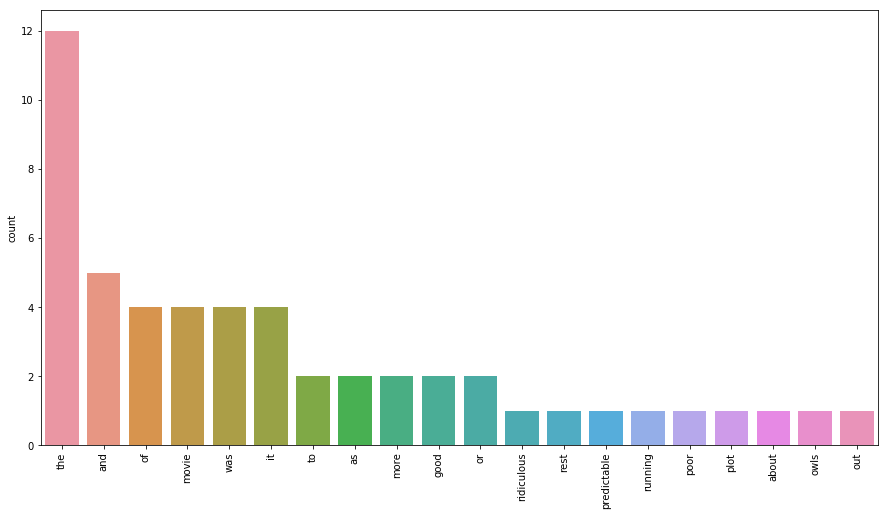

In [15]:
most_frequent_words_sub = most_frequent_words(count_vect,X_sub)

### Passage aux données complètes

In [16]:
X = df['sentence']

Taille du dictionnaire :  3044


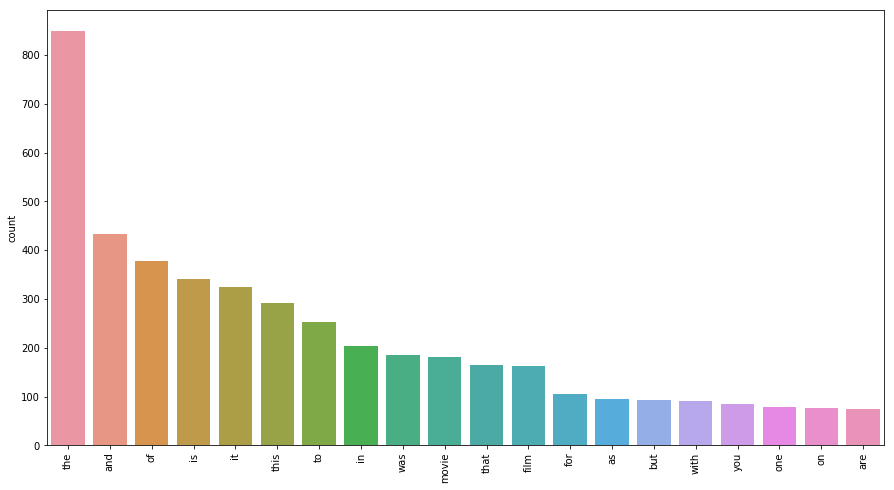

In [17]:
most_frequent_words_tot = most_frequent_words(count_vect,X)

Quels problèmes voyez-vous ?

L'ensemble de données ci-dessus est un ensemble de données complet et contient tous les mots. Il est évident que les mots qui se rallient à la préposition sont probablement les mots les plus répétitifs. Par conséquent, pour trouver les mots les plus fréquents et les plus importants, nous devrions supprimer ces mots sans importance. Ces mots sont appelés "mots vides"( mots non significatifs).

## Préparation des données

### Miniscules UTF-8 sans ponctuation

Toujours vérifier que les mots sont en minuscule, qu'il n'a pas de signe de ponctuation, etc

### Stopwords

In [8]:
stop = set(stopwords.words('english')) 
print(stop)

{'isn', 'when', 'again', 'm', 'ain', 'into', 'himself', 'our', 'this', 'for', "you're", 'it', 'myself', 'o', 'her', "needn't", 'under', 'those', 'him', 'why', 'weren', 'off', 'nor', 'hadn', 'my', 'same', 's', 'further', 'being', 'shan', 'very', 'haven', 'should', "that'll", 'than', 'y', 'your', "mightn't", 'after', 'am', 'couldn', 'to', 'below', 'mightn', "you'd", 'not', 'which', 'down', 't', 'up', 'have', 'above', 'then', "should've", 'out', 'against', 'its', 'wouldn', 'such', 'if', "you've", 'both', 'all', 'any', "you'll", 'she', 'needn', 'having', "it's", 'between', "mustn't", 'so', "shan't", 'd', "wouldn't", 'we', 'he', 'there', "isn't", 'once', "weren't", 'do', 'herself', 'or', "wasn't", 'these', 'through', 'each', 'can', 'yourselves', 'just', 'more', 'a', 'ours', "didn't", "haven't", 'had', 'them', 'while', 'how', 'over', 'hasn', "shouldn't", 'wasn', 'ourselves', 'because', 'shouldn', 'until', 'here', 'his', "aren't", 'me', 'an', 'and', 'be', 'from', 'yourself', 'the', 'but', 'do

Ci-dessus se trouve la liste de tous les mots vides que nous allons supprimer de nos données.

In [19]:
stop.update({'movie','film'})

Mis à jour la liste en fonction du contexte de notre jeu de données.

Taille du dictionnaire :  2913


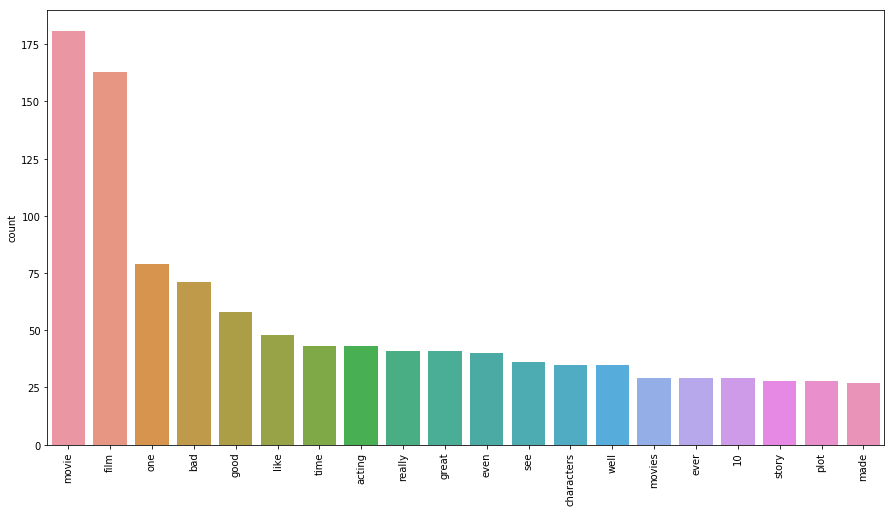

In [17]:
count_vect_sw = CountVectorizer(stop_words=stop)
most_frequent_words_sw = most_frequent_words(count_vect_sw,X)

Maintenant, nous pouvons voir que les mots les plus fréquents semblent importants et qu'il n'y a pas de mots vides

### Visualisation du corpus

In [21]:
most_frequent = np.array(most_frequent_words_sw['data_counts'].toarray())
hist = most_frequent / most_frequent.sum(axis=1)[:,None]

In [22]:
hist[np.argsort(df['label']),:]

array([[0. , 0. , 0. , ..., 0. , 0. , 0. ],
       [0. , 0. , 0. , ..., 0. , 0. , 0. ],
       [0. , 0. , 0. , ..., 0. , 0. , 0. ],
       ...,
       [0.4, 0. , 0. , ..., 0. , 0. , 0. ],
       [0. , 0. , 0. , ..., 0. , 0. , 0. ],
       [0. , 0. , 0. , ..., 0. , 0. , 0. ]])

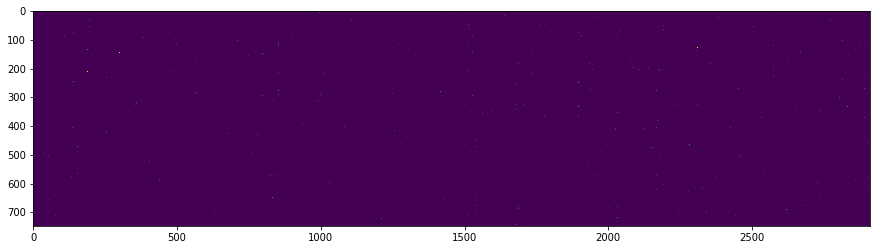

In [23]:
plt.figure(figsize=(15,8))
plt.imshow(hist[np.argsort(df['label']),:])
plt.colorbar()

### Avec TF_IDF

In [5]:
transformer = TfidfTransformer(smooth_idf=False)
transformer

TfidfTransformer(norm='l2', smooth_idf=False, sublinear_tf=False,
         use_idf=True)

Convertir les mots en vecteur

In [18]:
tf_idf_transf = transformer.fit_transform(most_frequent_words_sw['data_counts'])

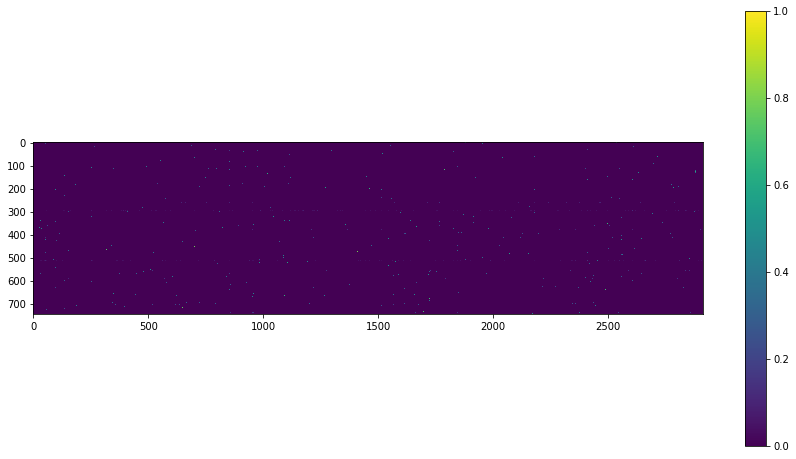

In [26]:
plt.figure(figsize=(15,8))
plt.imshow(tf_idf_transf.toarray()[np.argsort(df['label']),:])
plt.colorbar()

## Apprentissage supervisé

### Sur les counts

Nous allons ensuite appliquer des algorithmes de classification par ML pour classer le jeu de données de révision imdb. 

In [27]:
NB_counts = MultinomialNB()
NB_counts.fit(X=most_frequent_words_sw['data_counts'],y=df['label'])
accuracy_score(NB_counts.predict(most_frequent_words_sw['data_counts']),df['label'])

0.9665327978580991

### Sur le TF-IDF

In [28]:
NB_tfidf = GaussianNB()
NB_tfidf.fit(X=tf_idf_transf.toarray(),y=df['label'])
accuracy_score(NB_tfidf.predict(tf_idf_transf.toarray()),df['label'])

0.9665327978580991

In [29]:
df['prediction_counts'] = NB_counts.predict(most_frequent_words_sw['data_counts'])

In [30]:

df['prediction_tfidf'] = NB_tfidf.predict(tf_idf_transf.toarray())

In [31]:

df[df['prediction_tfidf'] != df['label']]

,sentence,label,prediction_counts,prediction_tfidf
23,Give this one a look.,1,1,0
38,I don't think you will be disappointed.,1,0,0
58,A great film by a great director.,1,1,0
63,10/10,1,1,0
163,Everything from acting to cinematography was s...,1,1,0
250,"I won't say any more - I don't like spoilers, ...",1,0,0
293,But this movie really got to me.,1,1,0
294,See it.,1,1,0
312,The cast is good.,1,1,0
332,the cast was great.,1,1,0


Ici il se trouve le tableau des incohérences entre les labels vraies et les labels prédites.

In [32]:
df[df['prediction_counts'] != df['label']]

,sentence,label,prediction_counts,prediction_tfidf
20,If there was ever a movie that needed word-of-...,1,0,1
38,I don't think you will be disappointed.,1,0,0
49,The directing and the cinematography aren't qu...,0,1,0
76,"I saw ""Mirrormask"" last night and it was an un...",0,1,0
123,Highly unrecommended.,0,1,0
131,There were too many close ups.,0,1,0
142,It even has its sweet moments.,1,0,1
175,"If you see it, you should probably just leave ...",0,1,0
235,1/10 - and only because there is no setting fo...,0,1,0
244,The last 15 minutes of movie are also not bad ...,1,0,1


### SGD classifier

In [33]:
NB_logistic = SGDClassifier(loss='hinge', penalty='l2',\
                           alpha=1e-3, random_state=42,\
                           max_iter=5, tol=None)
logistic_fit = NB_logistic.fit(X=tf_idf_transf.toarray(),y=df['label'])
accuracy_score(NB_logistic.predict(tf_idf_transf.toarray()),df['label'])

0.9879518072289156

In [34]:
print("Mots avec le coeff le plus négatif : ", most_frequent_words_sw['dictionary'][np.argsort(NB_logistic.coef_)[0][0]])
print("Mots avec le coeff le plus positif : ", most_frequent_words_sw['dictionary'][np.argsort(NB_logistic.coef_)[0][-1]])

Mots avec le coeff le plus négatif :  bad
Mots avec le coeff le plus positif :  beautiful


### Avec une pipeline

In [35]:
from sklearn.pipeline import Pipeline
text_clf = Pipeline([('vect', CountVectorizer()), ('tfidf', TfidfTransformer()), ('clf', SGDClassifier(loss='hinge', penalty='l2',\
                           alpha=1e-3, random_state=42,\
                           max_iter=5, tol=None)),])

In [36]:
text_clf.fit(X,df['label'])#
accuracy_score(text_clf.predict(X),df['label'])

0.9825970548862115

## Jeu de données complet

Dataset of 25,000 movies reviews from IMDB, labeled by sentiment (positive/negative). Reviews have been preprocessed, and each review is encoded as a sequence of word indexes (integers). For convenience, words are indexed by overall frequency in the dataset, so that for instance the integer "3" encodes the 3rd most frequent word in the data. This allows for quick filtering operations such as: "only consider the top 10,000 most common words, but eliminate the top 20 most common words".

In [2]:
#Chargement des données à l’aide de keras
(x_train, y_train), (x_test, y_test) = imdb.load_data(path="imdb.npz",
                                                      num_words=None,
                                                      skip_top=0,
                                                      maxlen=None,
                                                      seed=113,
                                                      start_char=1,
                                                      oov_char=2,
                                                      index_from=3)

En utilisant keras, nous chargeons le jeu de données IMDB.

### Les textes ont été hashés

In [3]:
x_train[0:2] # impression des 2 premiers commentaires (sous forme codée)

array([list([1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 22665, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 21631, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 19193, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 10311, 8, 4, 107, 117, 5952, 15, 256, 4, 31050, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 12118, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]),
       list([1, 194, 1

### On essaie de reconstruire le 6-ième texte

la fonction utilisée en dessous est pour obtenir des mots de texte en passant des valeurs entières

In [6]:
#obtenir des mots de texte en passant des valeurs entières
def getKeysByValue(dictOfElements, valueToFind):
    listOfKeys = list()
    listOfItems = dictOfElements.items()
    for item  in listOfItems:
        if item[1] == valueToFind:
            listOfKeys.append(item[0])
            print(listOfKeys)

In [7]:
for word_num in x_train[0]:
    getKeysByValue(imdb.get_word_index(),word_num)

['the']
['as']
['you']
['with']
['out']
['themselves']
['powerful']
['lets']
['loves']
['their']
['becomes']
['reaching']
['had']
['journalist']
['of']
['lot']
['from']
['anyone']
['to']
['have']
['after']
['out']
['atmosphere']
['never']
['more']
['room']
['titillate']
['it']
['so']
['heart']
['shows']
['to']
['years']
['of']
['every']
['never']
['going']
['villaronga']
['help']
['moments']
['or']
['of']
['every']
['chest']
['visual']
['movie']
['except']
['her']
['was']
['several']
['of']
['enough']
['more']
['with']
['is']
['now']
['current']
['film']
['as']
['you']
['of']
['mine']
['potentially']
['unfortunately']
['of']
['you']
['than']
['him']
['that']
['with']
['out']
['themselves']
['her']
['get']
['for']
['was']
['camp']
['of']
['you']
['movie']
['sometimes']
['movie']
['that']
['with']
['scary']
['but']
['pratfalls']
['to']
['story']
['wonderful']
['that']
['in']
['seeing']
['in']
['character']
['to']
['of']
['70s']
['musicians']
['with']
['heart']
['had']
['shadows']
['they'

In [9]:
sent=[]  # créer une liste de phrases
word_index = imdb.get_word_index()  # cette fonction est utilisée pour obtenir des mots de reviews
  
reverse_word_index = dict(
[(value, key) for (key, value) in word_index.items()])

for each in range (len(x_train)):
    decoded_review = ' '.join([reverse_word_index.get(i - 3, '?') for i in x_train[each]])
    sent.append(decoded_review)  # reviews dans un format text au lieu des entiers codés

data=pd.DataFrame(sent,columns=["sentence"]) #on crée une dataframe de phrases

data["label"]=y_train

data.head() #on imprime les 5 premières lignes du data

,sentence,label
0,? this film was just brilliant casting locatio...,1
1,? big hair big boobs bad music and a giant saf...,0
2,? this has to be one of the worst films of the...,0
3,? the scots excel at storytelling the traditio...,1
4,? worst mistake of my life br br i picked this...,0


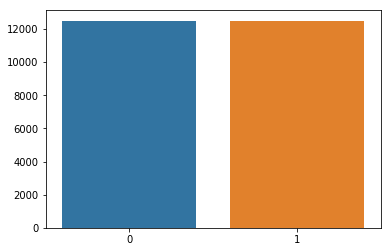

In [7]:
sns.barplot(np.unique(data['label']),data.groupby('label').count().values[:,0])  #diagramme en barres du décompte de chaque labels(0 et 1)

# Bag of words

Ici on fait la représentation de bag of words, qui convertira les données en forme vectorielle afin que nous puissions appliquer ML.

In [10]:
X_sub = data['sentence'][0:10]  #on prend un sous-ensemble au lieu de données entières

count_vect = CountVectorizer()     #vectoriser les mots
X_sub_counts = count_vect.fit_transform(X_sub)
dictionary_sub   = count_vect.get_feature_names()
print(dictionary_sub)

['18th', '1990s', '2006', '2008', '80', '80s', '85', '86', '90s', 'abomination', 'about', 'accepted', 'accessability', 'across', 'acting', 'actor', 'actors', 'actually', 'adaption', 'add', 'after', 'again', 'against', 'age', 'aged', 'agree', 'aimed', 'alive', 'all', 'almost', 'along', 'also', 'altieri', 'am', 'amazement', 'amazing', 'american', 'among', 'amores', 'an', 'ancient', 'and', 'angus', 'annoyed', 'anyone', 'anything', 'aonghas', 'april', 'archetypes', 'are', 'army', 'as', 'aside', 'asleep', 'aspect', 'aspiration', 'associated', 'at', 'atmosphere', 'audience', 'austen', 'authenticity', 'away', 'awe', 'awful', 'back', 'bad', 'badly', 'bars', 'basement', 'bashing', 'battle', 'battles', 'be', 'beautiful', 'beauty', 'because', 'become', 'been', 'before', 'begins', 'behind', 'being', 'believe', 'bereavement', 'best', 'better', 'between', 'beyond', 'big', 'bigger', 'bill', 'bit', 'blend', 'blood', 'bloody', 'bodies', 'boobs', 'boring', 'born', 'both', 'bottle', 'bought', 'bounce', '

In [11]:
print(count_vect.vocabulary_.get(u'who')) #combien de fois le mot "who" apparaît

830


In [12]:
print(X_sub_counts.shape) 
print(X_sub_counts[0])
print(type(X_sub_counts))

(10, 861)
  (0, 799)	1
  (0, 657)	1
  (0, 20)	1
  (0, 434)	1
  (0, 683)	1
  (0, 781)	1
  (0, 452)	1
  (0, 223)	1
  (0, 224)	1
  (0, 572)	1
  (0, 73)	1
  (0, 664)	1
  (0, 746)	1
  (0, 117)	1
  (0, 831)	2
  (0, 581)	1
  (0, 89)	1
  (0, 712)	1
  (0, 797)	1
  (0, 332)	1
  (0, 28)	3
  (0, 743)	1
  (0, 561)	1
  (0, 696)	1
  (0, 76)	2
  :	:
  (0, 598)	1
  (0, 615)	1
  (0, 745)	2
  (0, 82)	2
  (0, 379)	1
  (0, 175)	1
  (0, 856)	4
  (0, 41)	9
  (0, 562)	2
  (0, 747)	4
  (0, 545)	2
  (0, 739)	15
  (0, 715)	1
  (0, 595)	2
  (0, 255)	2
  (0, 209)	1
  (0, 702)	2
  (0, 640)	1
  (0, 441)	1
  (0, 134)	1
  (0, 110)	3
  (0, 408)	4
  (0, 813)	11
  (0, 280)	6
  (0, 752)	3
<class 'scipy.sparse.csr.csr_matrix'>


In [13]:
word_counts = pd.DataFrame(X_sub_counts.toarray(),columns = dictionary_sub)
word_total_counts = pd.DataFrame()
word_total_counts['count'] = word_counts.sum(axis=0)
word_total_counts['word'] = dictionary_sub

In [14]:
word_total_counts_sorted_top  = word_total_counts.sort_values(by="count",ascending = False).iloc[0:20] # top 20 mots

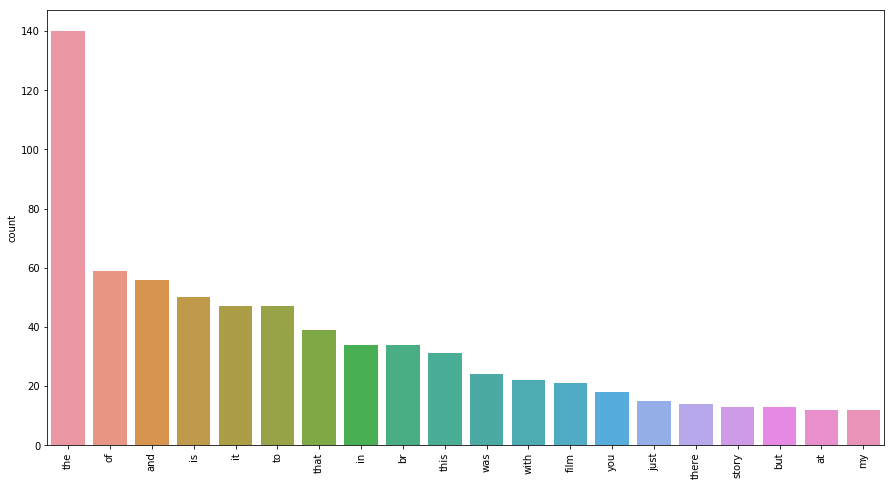

In [15]:
plt.figure(figsize=(15,8))
sns.barplot(x = word_total_counts_sorted_top.index,y=word_total_counts_sorted_top['count'])
plt.xticks(rotation=90,fontsize=10)
plt.show()

On a les données d'origine avec des mots vides. Nous devrons maintenant supprimer les stopwords.

In [16]:
def most_frequent_words(count_vect,data):     #fonction de vérification des mots les plus fréquents
    data_counts = count_vect.fit_transform(data)
    dictionary   = count_vect.get_feature_names()
    print("Taille du dictionnaire : ",len(dictionary))
    word_counts = pd.DataFrame(data_counts.toarray(),columns = dictionary)
    word_total_counts = pd.DataFrame()
    word_total_counts['count'] = word_counts.sum(axis=0)
    word_total_counts['word'] = dictionary
    word_total_counts_sorted_top  = word_total_counts.sort_values(by="count",ascending = False).iloc[0:20]
    plt.figure(figsize=(15,8))
    sns.barplot(x = word_total_counts_sorted_top.index,y=word_total_counts_sorted_top['count'])
    plt.xticks(rotation=90,fontsize=10)
    plt.show()
    return {'data_counts' : data_counts, 'word_total_counts' :word_total_counts, 'dictionary' : dictionary}

In [17]:
count_vect = CountVectorizer()
X_sub_counts = count_vect.fit_transform(X_sub)

Taille du dictionnaire :  861


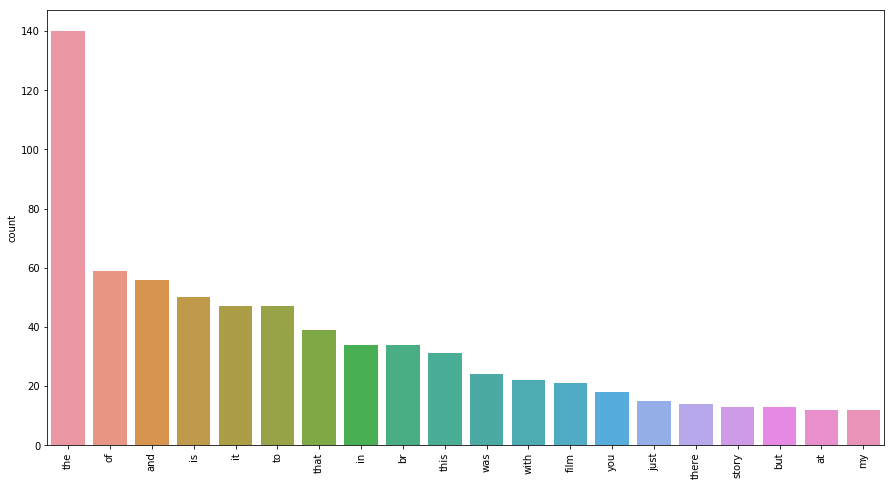

In [18]:
most_frequent_words_sub = most_frequent_words(count_vect,X_sub)

In [19]:
X=data["sentence"]  # On prend Maintenant tous le data au lieu de sous ensemble

stop = set(stopwords.words('english'))   #Supprimer les stopwords
stop.update({'movie','film'})
print(stop)



{'which', 'aren', 'through', 'when', 'will', 're', 'yourself', 'is', 'only', "shan't", 'both', 'all', 'their', 'whom', 'do', 'once', 'any', 'what', 'couldn', 'they', 'can', 'those', 'themselves', 'ourselves', 'in', 'why', 's', 'because', 'during', 'herself', 'mightn', 'myself', 'does', 'own', 'haven', 'ours', "won't", 'i', 'doesn', 'out', 'film', 'didn', 'hers', 'have', "hadn't", 'am', 'wasn', "weren't", 'her', "it's", 'with', 'we', 'was', 'having', 'from', 'being', 'are', 'don', 'over', 'yourselves', 'after', "mightn't", 'down', 'not', 'to', 'below', "wasn't", 'should', 'other', 'a', 'be', 'some', 'but', 'further', "needn't", 'had', 'above', 'o', 'ain', "haven't", 'me', 'them', 'd', "hasn't", 'too', 'itself', 'doing', 'very', 'won', 'up', 'hasn', 'needn', 'isn', 'your', 'same', 'theirs', 'were', "couldn't", 'his', 'by', "didn't", 'into', 'ma', 'more', 'for', 'y', 't', 'off', "should've", 'where', 'there', 'this', 'so', 'she', 'under', 'few', 'been', 'he', 'has', "isn't", "wouldn't", "

Taille du dictionnaire :  74702


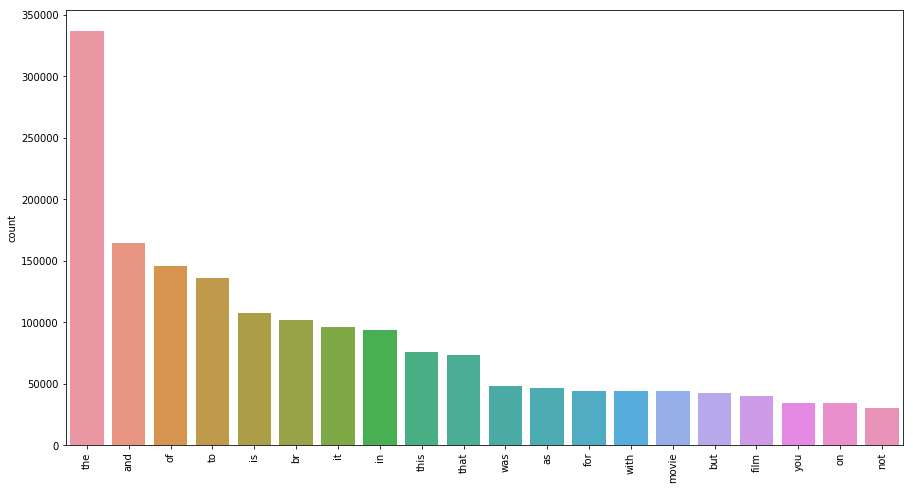

In [20]:
most_frequent_words_tot = most_frequent_words(count_vect,X) #total avant suppression du stopwords

Taille du dictionnaire :  74555


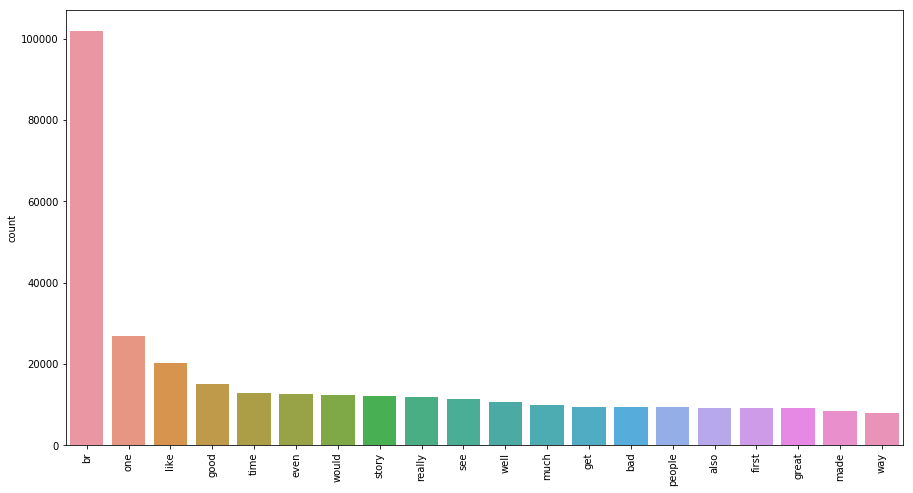

In [21]:
count_vect_sw = CountVectorizer(stop_words=stop)  # trouver le mot le plus fréquent après la suppression
most_frequent_words_sw = most_frequent_words(count_vect_sw,X)

Maintenant, on a les données propres après la suppression du stopword

In [22]:
most_frequent = np.array(most_frequent_words_sw['data_counts'].toarray())
hist = most_frequent / most_frequent.sum(axis=1)[:,None]

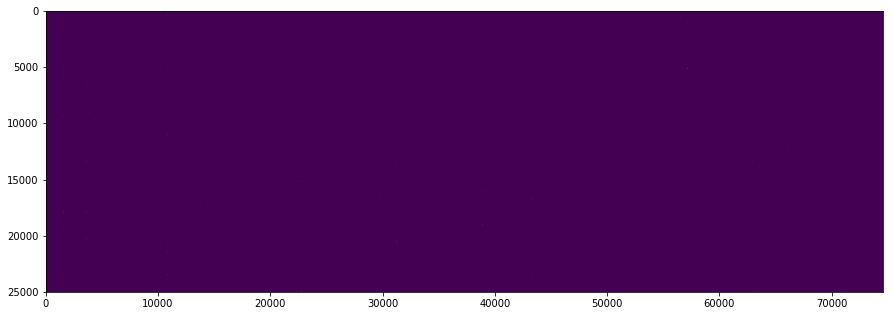

In [23]:
plt.figure(figsize=(15,8))
plt.imshow(hist[np.argsort(y_train),:])

In [24]:
transformer = TfidfTransformer(smooth_idf=False)  # tf-idf  représentation vectorielle utilisée pour les modèles du ML
transformer

TfidfTransformer(norm='l2', smooth_idf=False, sublinear_tf=False,
         use_idf=True)

In [25]:
tf_idf_transf = transformer.fit_transform(most_frequent_words_sw['data_counts'])

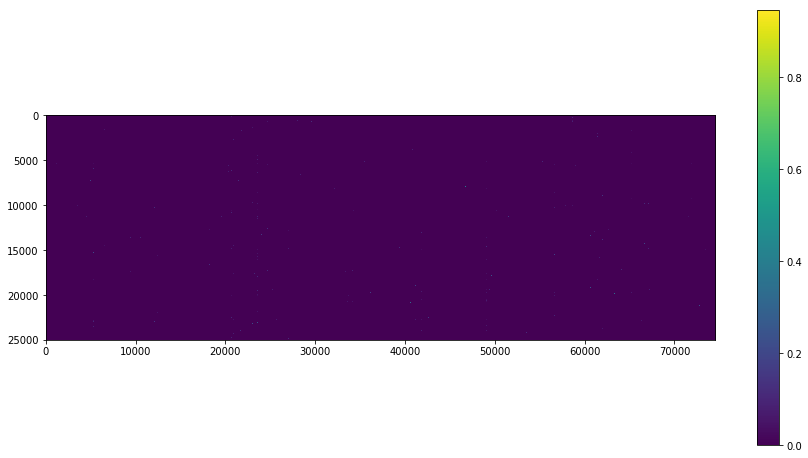

In [23]:
plt.figure(figsize=(15,8))
plt.imshow(tf_idf_transf.toarray()[np.argsort(y_train),:])
plt.colorbar()

### Implémentation des algorithmes de Machine Learning

In [31]:
NB_counts = MultinomialNB() # Création d'objet du classifieur MNB
NB_counts.fit(X=most_frequent_words_sw['data_counts'],y=data["label"]) # ajustement du modèle sur les données
accuracy_score(NB_counts.predict(most_frequent_words_sw['data_counts']),data["label"])# prédire et vérification de la précision(accuracy)

0.91468

On obtient un score de précision de 91,2% 

In [33]:
NB_tfidf = GaussianNB()# Création d'objet du classifieur gaussien NB
NB_tfidf.fit(X=tf_idf_transf.toarray(),y=data["label"])# ajustement du modèle sur les données
accuracy_score(NB_tfidf.predict(tf_idf_transf.toarray()),data['label'])# prédire et vérification de la précision(accuracy)

0.94024

Avec le classifieur gaussien NB, on a obtenu un score de précision meilleure avec un pourcentage de 94%

In [34]:
data['prediction_counts'] = NB_counts.predict(most_frequent_words_sw['data_counts'])
data['prediction_tfidf'] = NB_tfidf.predict(tf_idf_transf.toarray())
data[data['prediction_tfidf'] != data['label']]

,sentence,label,prediction_counts,prediction_tfidf
0,? this film was just brilliant casting locatio...,1,1,0
22,? i hate reading reviews that say something li...,1,0,0
28,? bela lugosi appeared in several of these low...,1,0,0
58,? i watched the movie in a preview and i reall...,1,1,0
64,? i'm probably one of the biggest nancy drew f...,1,1,0
97,? not that much things happen in this movie bu...,1,0,0
118,? a series of shorts spoofing dumb tv shows gr...,1,0,0
123,? beautiful and touching movie rich colors gre...,1,1,0
142,? while i would say i enjoy the show i expecte...,1,1,0
143,? i myself am a kid at heart meaning i love wa...,1,1,0


In [41]:
NB_logistic = SGDClassifier(loss='hinge', penalty='l2',\
                            alpha=1e-3, random_state=42,\
                            max_iter=5, tol=None)                        # création d'objet pour classificateur SGD
logistic_fit = NB_logistic.fit(X=tf_idf_transf.toarray(),y=data['label'])# ajustement du modèle sur les données
accuracy_score(NB_logistic.predict(tf_idf_transf.toarray()),data['label'])# prédire et vérification de la précision(accuracy)

0.8652

Le score de pécision de SGD classifieur est de 86,5% , cela prouve que le classifieur NB gaussien est meilleur

In [42]:
print("Mots avec le coeff le plus négatif : ", most_frequent_words_sw['dictionary'][np.argsort(NB_logistic.coef_)[0][0]])
print("Mots avec le coeff le plus positif : ", most_frequent_words_sw['dictionary'][np.argsort(NB_logistic.coef_)[0][-1]])

Mots avec le coeff le plus négatif :  bad
Mots avec le coeff le plus positif :  great


On a bien obtenu le résultat du mot le plus négatif 'bad' et 'great' pour le mot plus positif

## LDA

In [15]:
#from sklearn.lda import LDA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

lda_clf = LDA()
lda_fit= lda_clf.fit(X=tf_idf_transf.toarray(),y=data['label'])

accuracy_score(lda_clf.predict(tf_idf_transf.toarray()),data['label'])

# le code of correct, mais il affiche une erreur de memoire. ( Lda & Qda & KNN)

ValueError: Too large work array required -- computation cannot be performed with standard 32-bit LAPACK.

## QDA

In [9]:
#from sklearn.qda import QDA
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as LDA
qda_clf = LDA()
qda_fit= lda_clf.fit(X=tf_idf_transf.toarray(),y=data['label'])
accuracy_score(qda_clf.predict(tf_idf_transf.toarray()),data['label'])

## KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn_clf = KNeighborsClassifier(n_neighbors=3)

knn_fit= knn_clf.fit(X=tf_idf_transf.toarray(),y=data['label'])
accuracy_score(knn_clf.predict(tf_idf_transf.toarray()),data['label'])


### Avec une pipeline

In [31]:
from sklearn.pipeline import Pipeline
text_clf = Pipeline([('vect', CountVectorizer()), ('tfidf', TfidfTransformer()), ('clf', SGDClassifier(loss='hinge', penalty='l2',\
                           alpha=1e-3, random_state=42,\
                           max_iter=5, tol=None)),])

In [38]:
text_clf.fit(X,data['label'])#
accuracy_score(text_clf.predict(X),data['label'])

0.85772

Le pourcentage de pécision pour Pipeline est de 86% qui reste inférieure que celle du classifieur Gaussien NB

On a chargé le review imdb dataset de keras, après on a converti le texte à l'aide de la représentation vectorielle tf-tdi afin de pouvoir saisir ces données dans des algorithmes de ML et les classer en positif et négatif.
Avec ces algorithmes, on a pu trouvé le mot le plus négatif 'bad' et le mot le plus positif 'great'